In [6]:
import json
import os
from shutil import copy
import cv2
import glob
import os
import datetime as dt
import re

In [2]:
malevic_folder = 'dataset-balanced/'

# Scenes per split

In [3]:
n_targets = {}

for split in ('test', 'val', 'train'):
    n_samples = 0
    n_targets[split] = {}
    for task in ('1small_2big_balanced', '2small_1big_balanced'):

        with open(malevic_folder + task + '/annotations/' + split + '.json') as f:
            split_data = json.load(f)

        for key, target_data in split_data.items():

            shape = target_data['target']['shape']
            color = target_data['target']['color']

            if (shape, color) in n_targets[split]:
                n_targets[split][(shape, color)] += len(target_data['samples'])
            else:
                n_targets[split][(shape, color)] = len(target_data['samples'])

            n_samples += len(target_data['samples'])

    print("Overall scenes (triples) in", split, ": ", n_samples)

Overall scenes (triples) in test :  1200
Overall scenes (triples) in val :  1160
Overall scenes (triples) in train :  10200


# Scenes per target

In [4]:
for split, values in n_targets.items():
    print("Split: ", split)
    for target, n in values.items():
        print(target, ":", n)

Split:  test
('triangle', 'red') : 60
('triangle', 'blue') : 60
('triangle', 'yellow') : 60
('triangle', 'green') : 60
('triangle', 'white') : 60
('circle', 'red') : 60
('circle', 'blue') : 60
('circle', 'yellow') : 60
('circle', 'green') : 60
('circle', 'white') : 60
('square', 'red') : 60
('square', 'blue') : 60
('square', 'yellow') : 60
('square', 'green') : 60
('square', 'white') : 60
('rectangle', 'red') : 60
('rectangle', 'blue') : 60
('rectangle', 'yellow') : 60
('rectangle', 'green') : 60
('rectangle', 'white') : 60
Split:  val
('triangle', 'red') : 58
('triangle', 'blue') : 58
('triangle', 'yellow') : 58
('triangle', 'green') : 58
('triangle', 'white') : 58
('circle', 'red') : 58
('circle', 'blue') : 58
('circle', 'yellow') : 58
('circle', 'green') : 58
('circle', 'white') : 58
('square', 'red') : 58
('square', 'blue') : 58
('square', 'yellow') : 58
('square', 'green') : 58
('square', 'white') : 58
('rectangle', 'red') : 58
('rectangle', 'blue') : 58
('rectangle', 'yellow') : 

# Small image frequency per queried object

In [ ]:
img_counter = {}

img_counter['test'] = {}
img_counter['val'] = {}
img_counter['train'] = {}

for split in ('test', 'val', 'train'):
    n_samples = 0
    for task in ('1small_2big_balanced', '2small_1big_balanced'):
        
        with open(malevic_folder + task + '/annotations/' + split + '.json') as f:
            split_data = json.load(f)

        for key, target_data in split_data.items():

            shape = target_data['target']['shape']
            color = target_data['target']['color']
            
            if str((shape, color)) not in img_counter[split]:
                img_counter[split][str((shape, color))] = {}
            
            for sample_id, sample in target_data['samples'].items():
                for pic_file in sample['images']:
                    if pic_file in img_counter[split][str((shape, color))]:
                        img_counter[split][str((shape, color))][pic_file] += 1
                    else:
                        img_counter[split][str((shape, color))][pic_file] = 1

# Small image frequency per queried object, taking object size into account

In [ ]:
img_counter = {}

img_counter['test'] = {}
img_counter['val'] = {}
img_counter['train'] = {}

for split in ('test', 'val', 'train'):
    n_samples = 0
    for task in ('1small_2big_balanced', '2small_1big_balanced'):

        with open(malevic_folder + task + '/annotations/' + split + '.json') as f:
            split_data = json.load(f)

        for key, target_data in split_data.items():

            shape = target_data['target']['shape']
            color = target_data['target']['color']

            if (str((shape, color, 'small')) or str((shape, color, 'big'))) not in img_counter[split]:
                img_counter[split][str((shape, color, 'small'))] = {}
                img_counter[split][str((shape, color, 'big'))] = {}
            
            if task == '1small_2big_balanced':
                for sample_id, sample in target_data['samples'].items():
                    
                    if sample['images'][0] in img_counter[split][str((shape, color, 'small'))]:
                        img_counter[split][str((shape, color, 'small'))][sample['images'][0]] += 1
                    else:
                        img_counter[split][str((shape, color, 'small'))][sample['images'][0]] = 1
                        
                    if sample['images'][1] in img_counter[split][str((shape, color, 'big'))]:
                        img_counter[split][str((shape, color, 'big'))][sample['images'][1]] += 1
                    else:
                        img_counter[split][str((shape, color, 'big'))][sample['images'][1]] = 1
                        
                    if sample['images'][2] in img_counter[split][str((shape, color, 'big'))]:
                        img_counter[split][str((shape, color, 'big'))][sample['images'][2]] += 1
                    else:
                        img_counter[split][str((shape, color, 'big'))][sample['images'][2]] = 1
                        
            if task == '2small_1big_balanced':
                for sample_id, sample in target_data['samples'].items():
                    
                    if sample['images'][0] in img_counter[split][str((shape, color, 'small'))]:
                        img_counter[split][str((shape, color, 'small'))][sample['images'][0]] += 1
                    else:
                        img_counter[split][str((shape, color, 'small'))][sample['images'][0]] = 1
                        
                    if sample['images'][1] in img_counter[split][str((shape, color, 'small'))]:
                        img_counter[split][str((shape, color, 'small'))][sample['images'][1]] += 1
                    else:
                        img_counter[split][str((shape, color, 'small'))][sample['images'][1]] = 1
                        
                    if sample['images'][2] in img_counter[split][str((shape, color, 'big'))]:
                        img_counter[split][str((shape, color, 'big'))][sample['images'][2]] += 1
                    else:
                        img_counter[split][str((shape, color, 'big'))][sample['images'][2]] = 1

# Add info about small images

In [32]:
for split in ['test', 'val', 'train']:
    for task in ['1small_2big_balanced', '2small_1big_balanced']:

        if task =='1small_2big_balanced':
            sizes = ['small', 'big', 'big']
            
        if task == '2small_1big_balanced':
            sizes = ['big', 'small', 'small']
            
        with open(malevic_folder + task + '/annotations/' + split + '.json') as f:
            split_data = json.load(f)
        
        with open('malevic/data/pos1/annotation/' + split + '_annotation.json') as f:
            original_annotation = json.load(f)
        
        for target_id, target_data in split_data.items():
            target_data['task'] = task.split('_')[0] + '_' + task.split('_')[1]
            shape = target_data['target']['shape']
            color = target_data['target']['color']
            for sample_id, sample_data in target_data['samples'].items():
                images = sample_data['images']
                sample_data['images_info'] = []
                for i, img in enumerate(images):
                    img_id = img.split('.')[0]
                    for obj in original_annotation[img_id][1]['objects']:
                        if (obj['shape'] == shape and obj['color'] == color and obj['size'] == sizes[i]):
                            sample_data['images_info'].append({'img_id' : img_id,
                                                               'size' : sizes[i],
                                                               'thresh_dist' : obj['thresh_dist']})
                            
        with open(malevic_folder + task + '_new' + '/annotations/' + split + '.json', 'w', encoding="utf-8") as f:
            json.dump(split_data, f)

# Statistics regarding threshold distance

In [12]:
thr_distances = []

for split in ['test', 'val', 'train']:
    for task in ['1small_2big_balanced', '2small_1big_balanced']:
        
        with open(malevic_folder + task + '_new' + '/annotations/' + split + '.json') as f:
            split_data = json.load(f)

        for target_id, target in split_data.items():
            for sample_id, sample in target['samples'].items():
                thr_triple = []
                for img_info in sample['images_info']:
                    thr_triple.append(img_info['thresh_dist'])
                thr_distances.append(thr_triple)

In [17]:
thr_distances[:20]

[['0.4611', '0.0956', '0.0353'],
 ['0.7886', '0.0048', '0.3135'],
 ['0.3887', '0.3203', '0.3025'],
 ['0.0142', '0.3075', '0.3657'],
 ['0.2512', '0.3224', '0.1804'],
 ['0.6235', '0.2556', '0.2331'],
 ['0.5467', '0.1607', '0.3361'],
 ['0.5711', '0.334', '0.1061'],
 ['0.6765', '0.3211', '0.3407'],
 ['0.5528', '0.2507', '0.3376'],
 ['0.1385', '0.3905', '0.3615'],
 ['0.6177', '0.3076', '0.2828'],
 ['0.0495', '0.2125', '0.2351'],
 ['0.4697', '0.2917', '0.2705'],
 ['0.0888', '0.3556', '0.1761'],
 ['0.3131', '0.1089', '0.3824'],
 ['0.5086', '0.3228', '0.331'],
 ['0.2809', '0.4483', '0.3875'],
 ['0.4081', '0.3726', '0.3411'],
 ['0.4923', '0.031', '0.2589']]

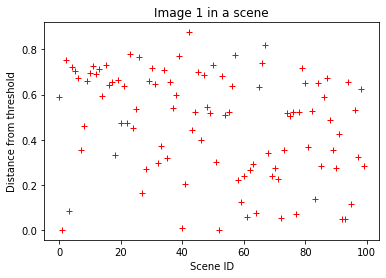

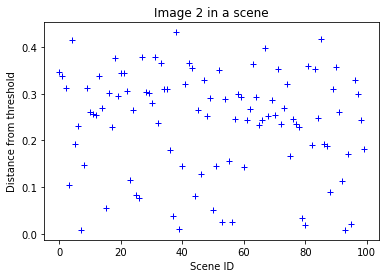

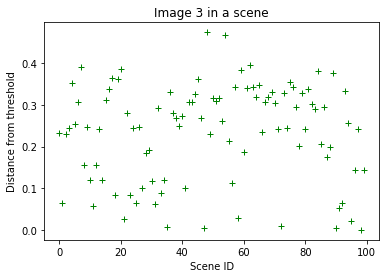

In [63]:
from numpy import *
import math
import matplotlib.pyplot as plt

a = []
b = []
c = []

for x, y, z in thr_distances:
    a.append(float(x))
    b.append(float(y))
    c.append(float(z))

plt.title('Image 1 in a scene')
plt.ylabel('Distance from threshold')
plt.xlabel('Scene ID')
plt.plot(range(len(a[5000:5100])), a[5000:5100], 'r', linestyle='none', marker='+') # plotting t, a separately 
plt.show()
plt.title('Image 2 in a scene')
plt.ylabel('Distance from threshold')
plt.xlabel('Scene ID')
plt.plot(range(len(b[5000:5100])), b[5000:5100], 'b', linestyle='none', marker='+') # plotting t, b separately 
plt.show()
plt.title('Image 3 in a scene')
plt.ylabel('Distance from threshold')
plt.xlabel('Scene ID')
plt.plot(range(len(c[5000:5100])), c[5000:5100], 'g', linestyle='none', marker='+') # plotting t, c separately 
plt.show()

In [91]:
difficult = []
original_distances = {'big':[],'small':[]}

for split in ['test', 'val', 'train']:
    with open('malevic/data/pos1/annotation/' + split + '_annotation.json') as f:
        original_annotation = json.load(f)

        for img_id, data in original_annotation.items():
            for obj in data[1]['objects']:
                original_distances[obj['size']].append(float(obj['thresh_dist']))
                if (float(obj['thresh_dist']) > 0 and float(obj['thresh_dist']) < 0.15):
                    difficult.append((img_id, obj['size'], obj['color']))

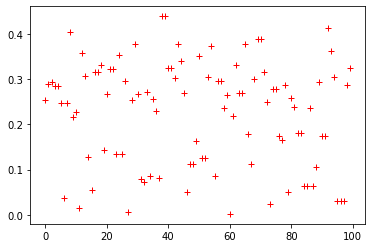

In [64]:
plt.plot(range(len(original_distances['big'][5000:5100])), original_distances['big'][5000:5100], 'r', linestyle='none', marker='+') # plotting t, a separately 
plt.show()

In [69]:
max(original_distances['big'])

0.5637

In [ ]:
sum((i > 0 and i < 0.05) for i in original_distances['big'])

In [ ]:
sum((i > 0 and i < 0.1) for i in original_distances['small'])

In [93]:
print(len(difficult))

15214

In [96]:
print(len(difficult))
print(len(original_distances['small']))
print(len(original_distances['big']))

15214
82631
32921


In [3]:
difficult = {'train':[], 'test':[], 'val':[]}

for split in ['test', 'val', 'train']:
    for task in ['1small_2big_balanced', '2small_1big_balanced']:
        
        with open(malevic_folder + task + '_new' + '/annotations/' + split + '.json') as f:
            split_data = json.load(f)

        for target_id, target in split_data.items():
            for sample_id, sample in target['samples'].items():
                thr_triple = []
                for img_info in sample['images_info']:
                    thr_triple.append(float(img_info['thresh_dist']))
                if sum((i > 0 and i < 0.1) for i in thr_triple):
                    difficult[split].append(sample['merged'])


In [6]:
with open(malevic_folder + 'difficult_scenes.json', 'w') as f:
    json.dump(difficult, f)

In [9]:
len(difficult['val'])

337

In [3]:
with open ("malevic-dataset/questions/test_questions.json") as f:
    test_big = json.load(f)
    
with open ("dataset-balanced/questions/test_questions.json") as f:
    test_small = json.load(f)

In [4]:
print(len(test_big['questions']))
print(len(test_small['questions']))

7200
4800


# Questions statistics

In [16]:
dataset_folder = 'dataset-balanced/'

stats_questions = {}
stats_answers = {}

for split in ('test', 'val', 'train'):
    stats_questions[split] = {}
    stats_answers[split] = {}
    
    for task in ('1small_2big_balanced_new/', '2small_1big_balanced_new/'):

        annotations_path = dataset_folder + task + "annotations/" + split + ".json"
        
        with open(annotations_path) as f:
            dataset = json.load(f)
        
        for target_id, target in dataset.items():
            shape = target['target']['shape']
            
            for sample_id, sample in target['samples'].items():
                for qw_answ in sample['questions']:
                    
                    qw = qw_answ['question']
                    answ = qw_answ['answer']
                    
                    i = qw.find("exactly")                  
                    if i < 0:
                        i = qw.find("more")
                        
                    shape_ids = [m.start() for m in re.finditer(shape, qw)]
                    j = shape_ids[1]
                    
                    q_type = qw[i:j]
                    
                    if q_type in stats_questions[split]:
                        stats_questions[split][q_type] += 1
                    else:
                        stats_questions[split][q_type] = 1
                        stats_answers[split][q_type] = {True: 0, False: 0}
                        
                    if q_type in stats_answers[split]:
                        stats_answers[split][q_type][answ] += 1
                    else:
                        print('this is very unexpected')
                    
                

In [22]:
with open("statistics/question_statistics.json", "w") as f:
    json.dump(stats_questions, f, ensure_ascii=False, indent=4)

In [23]:
with open("statistics/answers_per_question_statistics.json", "w") as f:
    json.dump(stats_answers, f, ensure_ascii=False, indent=4)

In [24]:
with open("statistics/image_statistics_query_per_task.json", "w") as f:   
    json.dump(tmp, f, ensure_ascii=False, indent=4)

In [ ]:
with open("statistics/image_statistics_query_size.json", "w") as f:   
    json.dump(tmp, f, ensure_ascii=False, indent=4)

In [29]:
with open("statistics/image_statistics_query_size.json") as f:
    tmp = json.load(f)

counter = {}
for split, data in tmp.items():
    counter[split] = {}
    for obj, pics in data.items():
        counter[split][obj] = 0
        for pic, freq in pics.items():
            counter[split][obj] += freq

In [30]:
counter

{'test': {"('triangle', 'red', 'small')": 90,
  "('triangle', 'red', 'big')": 90,
  "('triangle', 'blue', 'small')": 90,
  "('triangle', 'blue', 'big')": 90,
  "('triangle', 'yellow', 'small')": 90,
  "('triangle', 'yellow', 'big')": 90,
  "('triangle', 'green', 'small')": 90,
  "('triangle', 'green', 'big')": 90,
  "('triangle', 'white', 'small')": 90,
  "('triangle', 'white', 'big')": 90,
  "('circle', 'red', 'small')": 90,
  "('circle', 'red', 'big')": 90,
  "('circle', 'blue', 'small')": 90,
  "('circle', 'blue', 'big')": 90,
  "('circle', 'yellow', 'small')": 90,
  "('circle', 'yellow', 'big')": 90,
  "('circle', 'green', 'small')": 90,
  "('circle', 'green', 'big')": 90,
  "('circle', 'white', 'small')": 90,
  "('circle', 'white', 'big')": 90,
  "('square', 'red', 'small')": 90,
  "('square', 'red', 'big')": 90,
  "('square', 'blue', 'small')": 90,
  "('square', 'blue', 'big')": 90,
  "('square', 'yellow', 'small')": 90,
  "('square', 'yellow', 'big')": 90,
  "('square', 'green',